# tidylinreg Example

The `tidylinreg` package fits a linear model to a dataset, and can be used to carry out regression. `tidylinreg` computes and returns a list of summary statistics of the coefficients of the fitted linear model, including standard error, test statistic, confidence interval, and p-value.

To use `tidylinreg` in a project:

In [1]:
from tidylinreg.tidylinreg import LinearModel

LinearModel

tidylinreg.tidylinreg.LinearModel

## Data

To demonstrate Linear Regression using `tidylinreg`, we can use the [California housing dataset](https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_california_housing.html). This dataset has 8 numeric, predictive attributes and the target.

Attributes:
- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude

Target: The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
X = housing["data"]
y = housing["target"]

### Train/Test Split

Make sure to split the data into train and test sets to avoid any violations of the **Golden Rule**!

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=524)

### EDA

EDA is not the focus of this example, so here's just a quick preview of the data. A more detailed explanation of the data can be found [here](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).

In [4]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
190,3.3750,52.0,4.011905,1.071429,647.0,3.851190,37.79,-122.24
19599,1.5500,17.0,5.425150,1.080838,672.0,2.011976,37.56,-120.93
20100,2.0057,52.0,5.061728,1.078189,609.0,2.506173,37.96,-120.23
9708,1.9385,28.0,3.600000,1.039252,1717.0,3.209346,36.67,-121.65
20518,1.9426,32.0,3.957935,1.072658,2046.0,3.912046,38.58,-121.56
...,...,...,...,...,...,...,...,...
19206,1.9932,29.0,4.329949,1.053299,990.0,2.512690,38.47,-122.72
15131,2.3693,11.0,4.434608,1.042254,1472.0,2.961771,32.86,-116.92
5652,2.1382,21.0,3.708333,1.058036,1699.0,2.528274,33.73,-118.29
12733,8.6572,20.0,8.130435,1.027174,1105.0,3.002717,38.58,-121.35


### Scaling

This model uses simple linear regression with no regularization, so scaling of the features is optional but not required. Scaling is useful if we are interested in comparing relative feature importance; however, we should keep the data in its original scale in this example so that the linear regression coefficient estimates are more interpretable.

In [5]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train),
#                        columns=X_train.columns,
#                        index=X_train.index)
# X_test = pd.DataFrame(scaler.fit_transform(X_test),
#                       columns=X_test.columns,
#                       index=X_test.index)

## Fit

Let's define our model and fit it to the training data! 

In [5]:
model = LinearModel()
model.fit(X_train, y_train)

## Predict

How do our predictions look compared to the true values?

In [6]:
import matplotlib.pyplot as plt

preds = model.predict(X_test)

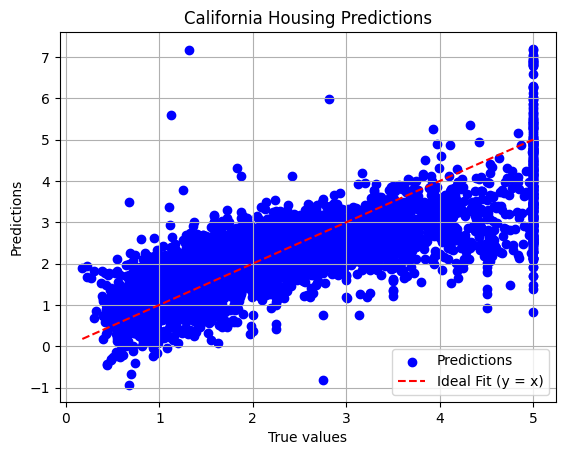

In [8]:
# Create a scatter plot
plt.scatter(y_test, preds, color='blue', label='Predictions')  # Scatter plot

# Add a reference line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', label='Ideal Fit (y = x)')

# Add labels and title
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('California Housing Predictions')
plt.legend()

# Display the plot
plt.grid(True)  # Optional: Add a grid for better readability
plt.show()

Our model is capturing the general trend of the data!

## Summary Statistics

This is the great part of `tidylinreg`! Calling `summary()` will calculate important statistical values for the linear model coefficient estimates, including standard error, test statistic, confidence interval, and p-values. The output of `summary()` is generated by calling the following internal class methods:
- `get_std_error()`
- `get_test_statistic()`
- `get_ci()`
- `get_pvalues()`

In [9]:
model.summary()

,Parameter,Estimate,Std. Error,T-Statistic,P-Value
0,(Intercept),-37.004147,0.790393,-46.817373,0.000000e+00
1,MedInc,0.438382,0.005039,86.989990,0.000000e+00
2,HouseAge,0.009267,0.000535,17.314654,0.000000e+00
3,AveRooms,-0.107089,0.006973,-15.358336,0.000000e+00
4,AveBedrms,0.635964,0.033466,19.003273,0.000000e+00
5,Population,-0.000007,0.000006,-1.160798,2.457431e-01
6,AveOccup,-0.003739,0.000536,-6.981016,3.058442e-12
7,Latitude,-0.422767,0.008629,-48.992423,0.000000e+00
8,Longitude,-0.435591,0.009039,-48.191074,0.000000e+00


## Interpretations

Wow, it looks like all of our coefficient estimates are statistically significant, except for `Population` (with a significance level alpha = 0.05). We can also make interpretations on these statistically significant coefficients; for example, we can say that a unit increase in median income in the block group (`MedInc`) is associated with an increase of \$43,838.20 in the median house value for the housing district (holding all other factors constant).